In [5]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
from scipy.stats import ttest_ind
from scipy.stats import linregress

In [7]:
final_datafile = "../CSV files/final_output_ryan.csv"

final_data = pd.read_csv(final_datafile)

In [8]:
final_data2 = final_data[['Name','Inspection_Score','Inspection_Grade','Rating','Reviews','Price','Category']]
final_data2


,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
0,El Tequilense Restaurant,94,A,4.0,42,$,Mexican
1,Seafood Express,91,A,4.0,266,$,Seafood
2,Pho Rowland Restaurant,93,A,4.0,408,$,Vietnamese
3,Jino's Pars,91,A,4.0,477,$$,Persian/Iranian
4,Pie-Not The Aussie Style Bakery,94,A,4.0,826,$,Bakeries
5,Sushi Gen,98,A,4.5,3536,$$$,Sushi Bars
6,Los Tres Hermanos,90,A,3.5,362,$$,Mexican
7,Bel-Air Bay Club,93,A,4.5,78,NaN,Social Clubs
8,Birrieria La Barca Jalisco Restaurant,97,A,3.5,236,$$,Mexican
9,Rigo's Taco,97,A,3.5,42,$,Mexican


In [111]:
final_data2['Category'].unique()

array(['Mexican', 'Seafood', 'Vietnamese', 'Persian/Iranian', 'Bakeries',
       'Sushi Bars', 'Social Clubs', 'Cinema', 'Pizza', 'Sandwiches',
       'Italian', 'Soul Food', 'Noodles', 'Diners', 'Cantonese',
       'Farmers Market', 'Hotels', 'Coffee & Tea', 'Fast Food',
       'Breweries', 'Performing Arts', 'Cafes', 'Desserts', 'Burgers',
       'Japanese Curry', 'Korean', 'Chinese', 'Grocery', 'Thai',
       'Hong Kong Style Cafe', 'American (New)', 'Breakfast & Brunch',
       'Hawaiian', 'Medical Centers', 'Delis', 'Bars',
       'American (Traditional)', 'Japanese', 'Auto Repair',
       'Ice Cream & Frozen Yogurt', 'Juice Bars & Smoothies', 'Creperies',
       'Mediterranean', 'Asian Fusion', 'Tapas/Small Plates', 'Karaoke',
       'Lounges', 'Indonesian', 'Ramen', 'Peruvian', 'Chicken Wings',
       'Seafood Markets', 'French', 'Greek', 'Shaved Ice', 'Tea Rooms',
       'Art Galleries', 'Poke', 'Gastropubs', 'Ethiopian', 'Food Trucks',
       'Donuts', 'Bubble Tea', 'Dance Clu

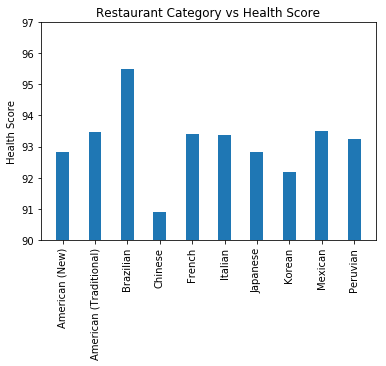

In [146]:
groupby_df = final_data2.groupby(['Category']).mean()
groupby_df.reset_index(inplace=True)
category_seperate = ['American (New)', 'American (Traditional)', 'Mexican', 'Korean', 'Chinese', 'Italian', 'Japanese', 'Peruvian', 'Brazilian', 'French']
final_df = groupby_df[groupby_df['Category'].isin(category_seperate)]
final_df.reset_index(inplace=True)
final_df

plt.bar(x = final_df['Category'], height = final_df['Inspection_Score'],width=0.4, bottom=None)
#plt.xticks(ticks = new_df2['Price Numb'], labels = new_df2['Symbol'])
plt.ylim(90,97)
plt.xticks(final_df['Category'], rotation="vertical")
plt.ylabel('Health Score')
plt.title('Restaurant Category vs Health Score')
plt.savefig("Restaurant Category vs Health Score.png", bbox_inches='tight')

In [ ]:
plt.bar(x = final_df['Category'], height = category_seperate['Inspection_Score'],width=0.4, bottom=None)
#plt.xticks(ticks = new_df2['Price Numb'], labels = new_df2['Symbol'])
plt.ylim(92,95)
plt.xlabel('Food Price')
plt.ylabel('Health Score')
plt.title('Food Price vs Health Score')
#plt.savefig("Food Price vs Health Score.png")

In [121]:


plt.bar(x = index, height = category_seperate['Inspection_Score'],width=0.4, bottom=None)
#plt.xticks(ticks = new_df2['Price Numb'], labels = new_df2['Symbol'])
plt.ylim(92,95)
plt.xlabel('Food Price')
plt.ylabel('Health Score')
plt.title('Food Price vs Health Score')
#plt.savefig("Food Price vs Health Score.png")

NameError: name 'index' is not defined

Text(0.5, 1.0, 'Inspection Score vs. Total Yelp Reviews')

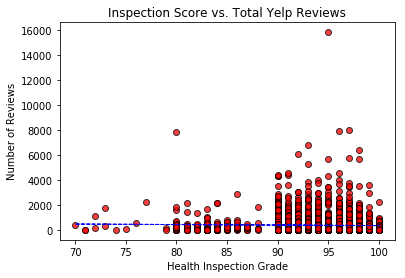

In [141]:
plt.scatter(final_data2['Inspection_Score'], final_data2['Reviews'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
(slope1, intercept1, _, _, _) = linregress(final_data2['Inspection_Score'], final_data2['Reviews'])
fit1 = slope1 * final_data2['Inspection_Score'] + intercept1
plt.plot(final_data2['Inspection_Score'], fit1, "b--", linewidth=1)
plt.xlabel("Health Inspection Grade")
plt.ylabel("Number of Reviews")
plt.title("Inspection Score vs. Total Yelp Reviews")
#plt.savefig("Images/Health_Rating_vs_Yelp_Reviews.png")

In [10]:
final_data2.Inspection_Grade.value_counts()

A    3374
B     171
C      13
Name: Inspection_Grade, dtype: int64

In [11]:
final_data2[final_data2['Reviews']>6000]

,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
266,Porto's Bakery & Cafe,97,A,4.5,7968,$,Bakeries
462,Porto's Bakery & Cafe,92,A,4.5,6115,$,Bakeries
1081,Daikokuya Little Tokyo,80,B,4.0,7858,$$,Ramen
1115,Wurstküche,96,A,4.0,7913,$$,Hot Dogs
1227,Bottega Louie,95,A,4.0,15795,$$,Italian
1258,Perch,98,A,4.0,6372,$$$,Lounges
1529,Pink's Hot Dogs,93,A,3.5,6826,$,Hot Dogs


In [27]:
final_data2['Price'].dtypes

dtype('O')

In [33]:
final_data2.fillna("", inplace=True)
#

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [35]:
final_data2['Price Numb'] = final_data2['Price'].map(lambda x: len(x))

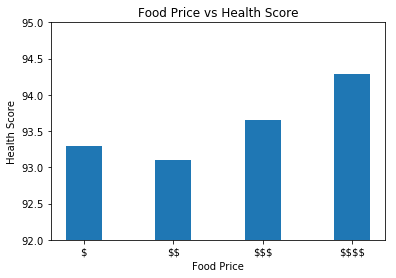

In [97]:
Price_numb_groupby = final_data2.groupby(['Price Numb']).mean()['Inspection_Score']
new_df = pd.DataFrame(Price_numb_groupby)
new_df2 = new_df.reset_index()
new_df2 = new_df2.drop(0)
new_df2['Symbol'] = ['$', '\$$', '\$$\$', '\$$\$\$']
#new_df2


plt.bar(x=new_df2['Price Numb'], height = new_df2['Inspection_Score'],width=0.4, bottom=None)
plt.xticks(ticks = new_df2['Price Numb'], labels = new_df2['Symbol'])
plt.ylim(92,95)
plt.xlabel('Food Price')
plt.ylabel('Health Score')
plt.title('Food Price vs Health Score')
plt.savefig("Food Price vs Health Score.png")

In [89]:
print('$$$$')

$$$$


In [12]:
#final_data.groupby(['Category'])
grouped_final_data = final_data2.groupby(['Category'])
groupby_category_sum = grouped_final_data.sum()['Reviews']
groupby_category_mean_yelp = grouped_final_data.mean()['Rating'] 
groupby_category_mean_health = grouped_final_data.mean()['Inspection_Score'] 
final_groupby = pd.DataFrame({"Rating": groupby_category_mean_yelp, "Reviews": groupby_category_sum, 
                              "Inspection_Score": groupby_category_mean_health})


In [13]:
final_groupby.sort_values(['Reviews'],ascending=False).head(15)

,Rating,Reviews,Inspection_Score
Category,,,
Mexican,3.714092,117407,93.501355
American (New),3.817391,91115,92.826087
Italian,3.959770,60293,93.367816
Japanese,3.849593,56782,92.829268
Bakeries,3.955357,52815,93.437500
Pizza,3.706061,51255,93.363636
Coffee & Tea,3.904762,47209,93.421769
Korean,3.986111,43958,92.180556
Burgers,3.610577,43630,93.403846


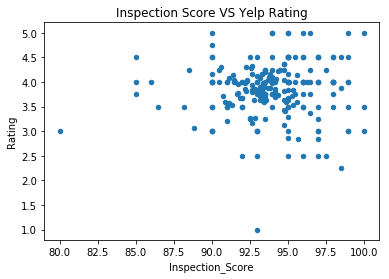

In [26]:
final_groupby.plot.scatter(x = 'Inspection_Score', y = 'Rating')
plt.title('Inspection Score VS Yelp Rating')
plt.savefig("Health_Rating_VS_Yelp_Score.png")

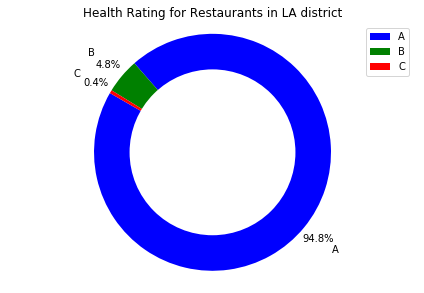

In [104]:
labels = ['A', 'B', 'C']
sizes = [94.77, 4.77, 0.43]
#colors
colors = ['blue','g','r']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=150, pctdistance=1.15, labeldistance=1.3)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels=labels,loc="best")
plt.title('Health Rating for Restaurants in LA district')
plt.savefig("Pie_chart_Health_Rating.png")

In [142]:
grouped_final_data = final_data2.groupby(['Category'])
groupby_category_mean_reviewcount = grouped_final_data.mean()['Reviews']
groupby_category_mean_yelp = grouped_final_data.mean()['Rating'] 
groupby_category_mean_health = grouped_final_data.mean()['Inspection_Score'] 
final_groupby = pd.DataFrame({"Rating": groupby_category_mean_yelp, "Reviews": groupby_category_mean_reviewcount, 
                              "Inspection_Score": groupby_category_mean_health})

In [144]:
final_groupby["scaled_rating"] = ((final_groupby['Rating'] - final_groupby['Rating'].min()) / (final_groupby['Rating'].max() - final_groupby['Rating'].min())) *50
final_groupby.head()

,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Acai Bowls,4.5,111.0,99.0,43.75
Adult Entertainment,3.2,192.0,91.0,27.50
Airlines,3.0,87.0,93.0,25.00
Airport Lounges,4.0,121.0,92.0,37.50
Airport Terminals,2.5,107.5,97.5,18.75


Text(0.5, 1.0, 'Average Category Inspection Score  vs. Average Yelp Reviews')

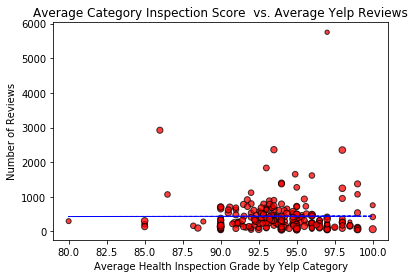

In [145]:
plt.scatter(final_groupby['Inspection_Score'], final_groupby['Reviews'], marker = "o", facecolors="red", edgecolors="black",
            s=final_groupby['scaled_rating'], alpha=0.75)
(slope2, intercept2, _, _, _) = linregress(final_groupby['Inspection_Score'],final_groupby['Reviews'])
fit2 = slope2 * final_groupby['Inspection_Score'] + intercept2
plt.plot(final_groupby['Inspection_Score'], fit2, "b--", linewidth=1)
plt.xlabel("Average Health Inspection Grade by Yelp Category")
plt.ylabel("Number of Reviews")
plt.title("Average Category Inspection Score  vs. Average Yelp Reviews")
#plt.savefig("Images/Category_bubble.png")